## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
booking_data = pd.read_csv('hotel_bookings.csv')

### **EXPLORATORY DATA ANALYSIS**

In [ ]:
booking_data.head()
booking_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
booking_data.shape

(119390, 32)

In [ ]:
booking_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#replacing missing values
booking_data.country.fillna('-', inplace=True)
booking_data.agent.fillna(0, inplace=True)
booking_data.company.fillna(0, inplace=True)
booking_data.children.fillna(0, inplace=True)


## Which hotels suffer most from cancellations?

* Overall, 44224 bookings were canceled, accounting for 37 percent of booked stays.


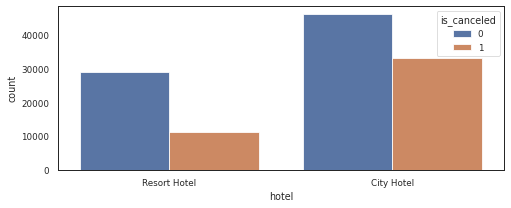

In [ ]:
booking_data['pax'] = booking_data.children+booking_data.adults
booking_data['stay_nights'] = booking_data.stays_in_week_nights+booking_data.stays_in_weekend_nights
booking_data['bill']=booking_data.stay_nights*booking_data.adr
booking_data['room_assignment'] = booking_data['reserved_room_type']==booking_data['assigned_room_type']
print('* Overall, %2.0f bookings were canceled, accounting for %2.0f percent of booked stays.'
      %(booking_data.is_canceled.sum(), booking_data.is_canceled.mean()*100))
plt.figure(figsize=(8,3))
sns.set_style("white")
sns.countplot(x='hotel', hue='is_canceled', data=booking_data)
plt.show()

Cancellation Financial impact


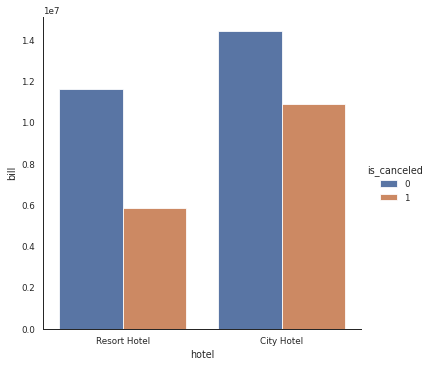

In [ ]:
print('Cancellation Financial impact')
sns.catplot(x='hotel', y='bill', hue='is_canceled', estimator=sum, ci=None, kind='bar', data=booking_data)
plt.show()

## Do people from certain areas/countires cancel more often than others?

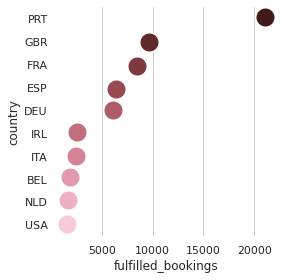

In [ ]:
booking_country = pd.DataFrame(booking_data.groupby('country').sum())
booking_country = booking_country.loc[:,['is_canceled','stay_nights','pax']]
booking_country['booking_count'] = booking_data.groupby('country').hotel.count()
booking_country['cancellation_rate'] =  booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfillment_rate'] =  1-booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfilled_bookings'] =  booking_country['booking_count']-booking_country['is_canceled']
sns.set(style="whitegrid")
toprint = booking_country.reset_index().sort_values(by='fulfilled_bookings', ascending=False).head(10)
g = sns.PairGrid(toprint, x_vars=toprint.columns[7:8], y_vars=['country'], height=4)
sns.despine(left=True, bottom=True)
g.map(sns.stripplot, size=20, orient="h", palette="ch:s=1,r=-.1,h=1_r", linewidth=2, edgecolor="w")
plt.show()

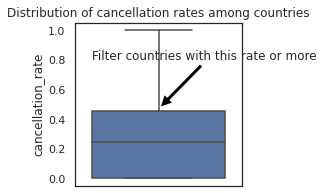

In [ ]:
plt.figure(figsize=(3,3))
sns.set_style("white")
sns.boxplot(data=booking_country, y='cancellation_rate')
plt.annotate('Filter countries with this rate or more', xy=(0.01, 0.48), xytext=(-0.4, 0.8),
            arrowprops=dict(facecolor='black', shrink=1),
            )
plt.title('Distribution of cancellation rates among countries')
plt.show()

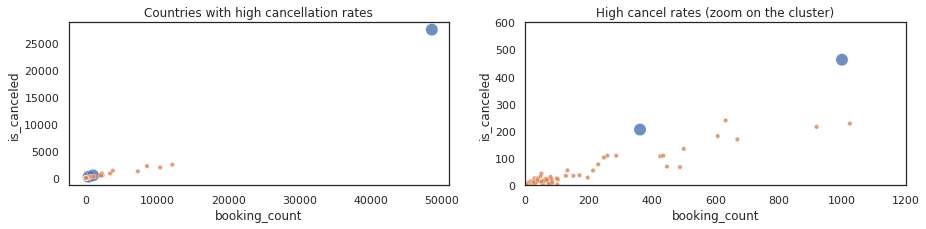

In [ ]:
#print(booking_country.quantile(0.75))
booking_country_plot = booking_country
booking_country_plot['hue'] = (booking_country['cancellation_rate']<0.45)|(booking_country['booking_count']<100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
sns.set_style('whitegrid')
ax1.set_title('Countries with high cancellation rates')
sns.scatterplot(data=booking_country_plot, x='booking_count', y='is_canceled', size='hue', hue='hue', sizes=(20,150), alpha=0.8, legend=False, ax=ax1)
ax2.set_title('High cancel rates (zoom on the cluster)')
sns.scatterplot(data=booking_country_plot, x='booking_count', y='is_canceled', hue='hue', size='hue', sizes=(20,150), alpha=0.8, legend=False, ax=ax2)
plt.xlim(0,1200)
plt.ylim(0,600)
plt.show()

In [ ]:
display(booking_country_plot[booking_country_plot['hue']==False].sort_values(by='is_canceled', ascending=False).loc[:,'is_canceled':'cancellation_rate'])

,is_canceled,stay_nights,pax,booking_count,cancellation_rate
country,,,,,
PRT,27519,141654,89599.0,48590,0.566351
CHN,462,2642,2021.0,999,0.462462
AGO,205,2938,647.0,362,0.566298


## Which period of the year has the peak number of bookings? Checking for seasonality

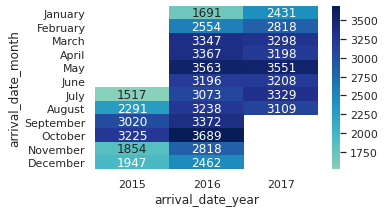

In [ ]:
bookings = booking_data[booking_data['is_canceled']==0].pivot_table(index='arrival_date_month', columns='arrival_date_year', values='hotel', aggfunc=len, fill_value=0)
bookings.index = pd.CategoricalIndex(bookings.index, categories=['January', 'February', 'March', 'April','May','June','July', 'August','September', 'October', 'November', 'December'], ordered=True)
bookings = bookings.sort_index()
mask = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]])
f, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(bookings, center=2000, annot=True, mask=mask, fmt="d", ax=ax, cmap="YlGnBu")
sns.set_context('paper')
plt.show()

## What are the features correlated with cancellations?

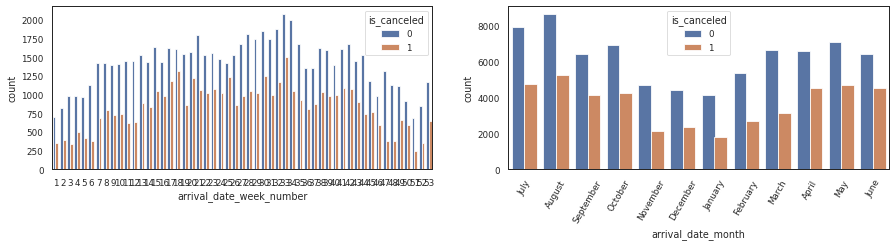

In [ ]:
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))
sns.countplot(data=booking_data, x='arrival_date_week_number', hue='is_canceled', ax=ax1)
sns.countplot(data=booking_data, x='arrival_date_month', hue='is_canceled', ax=ax2)
plt.xticks(rotation=60)
plt.show()

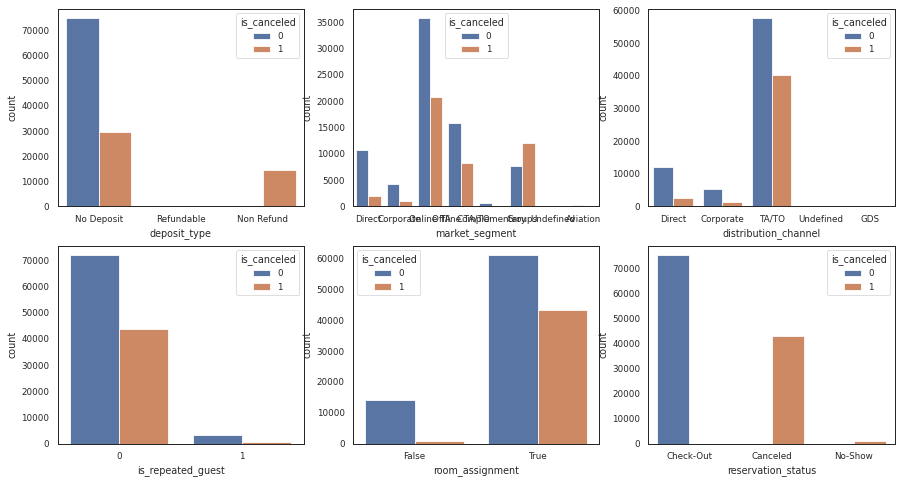

In [ ]:
sns.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(15,8))
sns.countplot(data=booking_data, x='deposit_type', hue='is_canceled', ax=axes[0][0])
sns.countplot(data=booking_data, x='market_segment', hue='is_canceled', ax=axes[0][1])
sns.countplot(data=booking_data, x='distribution_channel', hue='is_canceled', ax=axes[0][2])
sns.countplot(data=booking_data, x='is_repeated_guest', hue='is_canceled', ax=axes[1][0])
sns.countplot(data=booking_data, x='room_assignment', hue='is_canceled', ax=axes[1][1])
sns.countplot(data=booking_data, x='reservation_status', hue='is_canceled', ax=axes[1][2])
plt.show()

In [ ]:
#Average bill amount = average adr for checked-out bookings * average stay duration
bb= booking_data[booking_data['is_canceled']==0].adr.mean()*booking_data[booking_data['is_canceled']==0].stay_nights.mean()
#Subset of fulfilled bookings = 680
rr = booking_data[(booking_data['stay_nights']==0) & (booking_data['is_canceled']==0)].is_canceled.value_counts()
print('The average amount to be expected from the bookings is $%.2f' %(bb*rr))
booking_data = booking_data[booking_data['stay_nights']!=0]

The average amount to be expected from the bookings is $230697.20


### **MACHINE LEARNING MODELS**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score

*PREPARE DATA WITH DUMMY VARIABLES

In [ ]:
bookings = booking_data[['is_canceled', 'lead_time', 'country', 'hotel', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest']]
booking_data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'country', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest'])
print(booking_data_dummies.shape)

(118675, 206)


In [ ]:
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

**DECISION TREE CLASSIFIER**

In [ ]:
model_t = DecisionTreeClassifier(criterion='entropy', random_state=7)
model_t.fit(X_train, y_train)
y_pred = model_t.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

Score : 0.8133584248518383


**LOGISITIC REGRESSION**

In [ ]:
model_l = LogisticRegression(random_state=7, solver='liblinear')
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
print('Score :', accuracy_score(y_test, y_pred))

Score : 0.7767042103193551


**BAGGING CLASSIFIER**

In [ ]:
bc = BaggingClassifier(base_estimator=model_l, n_estimators=100)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.777


**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest Classifier: {:.3f}'.format(accuracy))

Accuracy of Random Forest Classifier: 0.815


**ADA BOOST**

In [ ]:
dt = DecisionTreeClassifier(max_depth=15, random_state=7)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=500)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('Accuracy of ADABoosted Descision Tree Classifier: {:.3f}'.format(adb_clf_roc_auc_score))

KeyboardInterrupt: ignored

**MODEL IMPACT ON REVENUE**

In [52]:
booking_sample = booking_data.sample(4420).sort_values(by='bill', ascending=False)
booking_sample.bill.sum()
booking_sample_0 = booking_sample[booking_sample['is_canceled']==0].sort_values(by='bill', ascending=False).head(int(4420*0.113)).bill.sum()
booking_sample_1 = booking_sample[booking_sample['is_canceled']==1].sort_values(by='bill', ascending=False).head(int(4420*0.113)).bill.sum()
upper_bound = booking_sample.bill.sum() + booking_sample_0
lower_bound = booking_sample.bill.sum() - booking_sample_1
print('The actual month revenue if between %.2f and %.2f of the predicted sum.' %(upper_bound/booking_sample.bill.sum(), lower_bound/booking_sample.bill.sum()))

The actual month revenue if between 1.28 and 0.77 of the predicted sum.


**OVERBOOKING APPLICATION OF MODEL**

In [53]:
print('* All in all, a rough calculation to optimally overbook the establishment at peak seasons is', int(88.7/0.6),'%')

* All in all, a rough calculation to optimally overbook the establishment at peak seasons is 147 %
